In [ ]:
# this cell's code was run in notebook 'primeTau1oct25no2'
from sage.all import sigma, nth_prime
from sage.arith.all import moebius
import pickle
import ast

def nieburTau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)


def primeTau(n):
    return nieburTau(nth_prime(n))


primeTau_list =[] # corrected prime list
for k in range(1, 501):
    primeTau_list.append([k,primeTau(k)])
    print(k)

with open('/Users/barrybrent/data/run1oct25no1.txt', 'wb') as wfile:
    pickle.dump(primeTau_list, wfile) #output snipped

with open('/Users/barrybrent/data/run1oct25no12.txt', 'rb') as rfile:
    primeTau_list = pickle.load(rfile)
h_list=[[0,1]]+primeTau_list # h_0 = 1 required by the lemmas
j_list=[(0,0)] # first entry is just an offset. 
for n in [1..500]:# so j(1) = 1 = h(0) as required.
    sm=0
    for r in [1..n-1]: # I change the lower bound to 1 from zero (in no1 of this series) to fit the paper.
        sm=sm+j_list[r][1]*h_list[n-r][1] #... I expect no changes in the outputs
    j_n=n*h_list[n][1]-sm
    j_list.append((n,j_n))
    
with open('/Users/barrybrent/data/run5oct25no12.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) # ouput snipped

In [34]:
with open('/Users/barrybrent/data/run1oct25no1.txt', 'rb') as rfile:
    prime_Tau_list = pickle.load(rfile) #tauPrime(n) j-companion
    n=5
print(prime_Tau_list[:n])
print(prime_Tau_list[1:n+1])
print()
with open('/Users/barrybrent/data/run1oct25no12.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
print(j_list[:n])
print(j_list[1:n+1])

[[1, -24], [2, 252], [3, 4830], [4, -16744], [5, 534612]]
[[2, 252], [3, 4830], [4, -16744], [5, 534612], [6, -577738]]

[(0, 0), (1, -24), (2, -72), (3, 18810), (4, 518528)]
[(1, -24), (2, -72), (3, 18810), (4, 518528), (5, 10323516)]


In [51]:
def P_matrix(lst):
    lenlist = len(lst)
    columns = [lst]
    for k in range(1, lenlist):
        column = [0]*(k-1) + [-k] + lst
        column = column[:lenlist]
        columns.append(column)
    return matrix(columns).transpose()

from sage.all import sigma, nth_prime
from sage.arith.all import moebius
import pickle
import ast

def nieburTau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)


def primeTau(n):
    return nieburTau(nth_prime(n))



with open('/Users/barrybrent/data/run1oct25no12.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)


from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
maxes_list=[]
log_mins_list=[]
log_maxes_list=[]
no=[]
tests=[]
for n in range(1,10):
    lst = [j[1] for j in j_list[1:n+1]] # cuts out the dummy offset
    inpt=[j for j in lst]
    pl=P_matrix(inpt)
    test=pl.det()/(primeTau(n)*factorial(n))
    tests.append(test)
    print((n,test))

    
print("tests:")
print(tests)

(1, 1)
(2, 1)
(3, 1)
(4, 1)
(5, 1)
(6, 1)
(7, 1)
(8, 1)
(9, 1)
tests:
[1, 1, 1, 1, 1, 1, 1, 1, 1]


In [49]:
import pickle
from sage.all import sigma, nth_prime
import ast

def nieburTau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def h(n):
    if n>0:
        return nieburTau(nth_prime(n)) # i.e., tauPrime(n)
    if n==0:
        return 1
        
with open('/Users/barrybrent/data/run1oct25no12.txt', 'rb') as rfile:
    j_list = pickle.load(rfile) #tauPrime(n) j-companion

def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
log_mins_list=[]
maxes_list=[]
log_maxes_list=[]
dets=[]
tests=[]
for n in range(1,4):
    print("------------------------------------------------------------------")
    print("n:",n,"undeformed:")
    undeformed_j_list=j_list[1:n+1]
    undeformed_inputs=[pair[1] for pair in undeformed_j_list]
    print("undeformed inputs:")
    print(undeformed_inputs)
    print()
    pl_undeformed=P_matrix(undeformed_inputs)
    undeformed_det=pl_undeformed.det()
    print("matrix:")
    show(pl_undeformed)
    print()
    print("h(n):",h(n),"det/n!:",undeformed_det/factorial(n))

------------------------------------------------------------------
n: 1 undeformed:
undeformed inputs:
[-24]

matrix:


[-24]


h(n): -24 det/n!: -24
------------------------------------------------------------------
n: 2 undeformed:
undeformed inputs:
[-24, -72]

matrix:


[-24  -1]
[-72 -24]


h(n): 252 det/n!: 252
------------------------------------------------------------------
n: 3 undeformed:
undeformed inputs:
[-24, -72, 18810]

matrix:


[  -24    -1     0]
[  -72   -24    -2]
[18810   -72   -24]


h(n): 4830 det/n!: 4830


(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 0)
(11, 0)
(12, 0)
(13, 0)
(14, 0)
(15, 0)
(16, 0)
(17, 0)
(18, 0)
(19, 0)
(20, 0)
(21, 0)
(22, 0)
(23, 0)
(24, 0)
(25, 0)
(26, 0)
(27, 0)
(28, 0)
(29, 0)
(30, 0)
(31, 0)
(32, 0)
(33, 0)
(34, 0)
(35, 0)
(36, 0)
(37, 0)
(38, 0)
(39, 0)
(40, 0)
(41, 0)
(42, 0)
(43, 0)
(44, 0)
(45, 0)
(46, 0)
(47, 0)
(48, 0)
(49, 0)
(50, 0)
(51, 0)
(52, 0)
(53, 0)
(54, 0)
(55, 0)
(56, 0)
(57, 0)
(58, 0)
(59, 0)
(60, 0)
(61, 0)
(62, 0)
(63, 0)
(64, 0)
(65, 0)
(66, 0)
(67, 0)
(68, 0)
(69, 0)
(70, 0)
(71, 0)
(72, 0)
(73, 0)
(74, 0)
(75, 0)
(76, 0)
(77, 0)
(78, 0)
(79, 0)
(80, 0)
(81, 0)
(82, 0)
(83, 0)
(84, 0)
(85, 0)
(86, 0)
(87, 0)
(88, 0)
(89, 0)
(90, 0)
(91, 0)
(92, 0)
(93, 0)
(94, 0)
(95, 0)
(96, 0)
(97, 0)
(98, 0)
(99, 0)
(100, 0)
(101, 0)
(102, 0)
(103, 0)
(104, 0)
(105, 0)
(106, 0)
(107, 0)
(108, 0)
(109, 0)
(110, 0)
(111, 0)
(112, 0)
(113, 0)
(114, 0)
(115, 0)
(116, 0)
(117, 0)
(118, 0)
(119, 0)
(120, 0)
(121, 0)
(122, 0)
(123, 0)
(

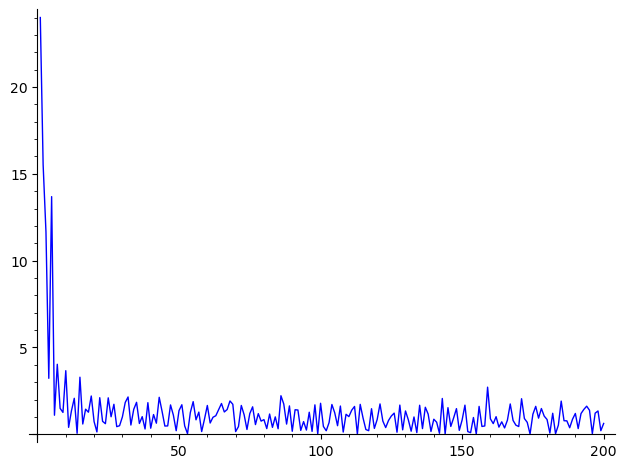

LOGS MINIMUM MODULI


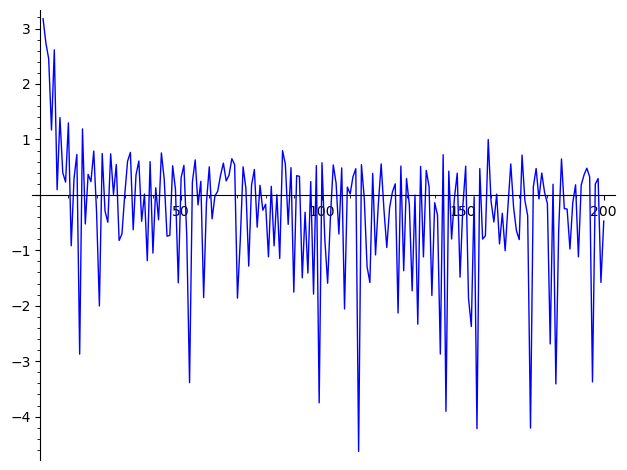

minimum logarithm of minimum modulus: -4.62614701176713321060424273628912168086029099621878316962275085?
MAXIMUM MODULI


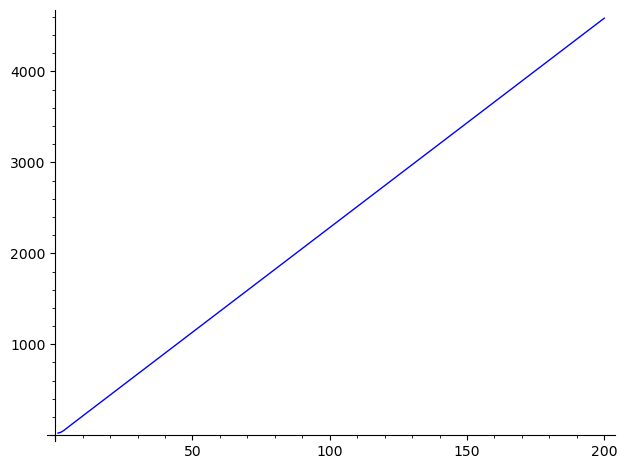

LOGS MAXIMUM MODULI


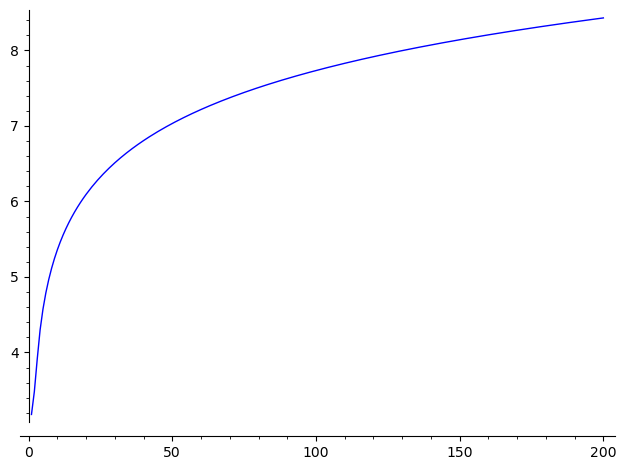

In [68]:
import pickle
from sage.all import sigma, nth_prime
import ast

def nieburTau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def h(n):
    if n>0:
        return nieburTau(nth_prime(n)) # i.e., tauPrime(n)
    if n==0:
        return 1
with open('/Users/barrybrent/data/run1oct25no12.txt', 'rb') as rfile:
    j_list = pickle.load(rfile) #tauPrime(n) j-companion
    
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
log_mins_list=[]
maxes_list=[]
log_maxes_list=[]
dets=[]
tests=[]
for n in range(1, 201):
    undeformed_j_list=j_list[1:n+1]
    inputs=[pair[1] for pair in undeformed_j_list]
    pl=P_matrix(inputs) ### UNDEFORMED
    det=pl.det()
    test=det-h(n)*factorial(n)
    tests.append(test)
    print((n,test))
    dets.append((n,det))
    matrix_list+=[(n,pl)]
    cp=pl.charpoly()
    charpol_list+=[(n,cp)]
    roots = cp.roots(ring=CIF, multiplicities=False)       
    roots_list+=[(n,roots)]
    centers=[r.center() for r in roots]
    pairs = [(z.real(), z.imag()) for z in centers]


    centers_list+=[(n,centers)]
    max_diameter=max([r.diameter() for r in roots])
    max_diameter_list+=[(n,max_diameter)]
    aar = [r.abs() for r in roots]
    aar_list+=[(n,aar)]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)  
        mins_list+=[(n,minn)]
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
        log_mins_list.append((n,log_minn))
        maxx = max(aar)  
        maxes_list.append((n,maxx))
        if maxx>0:
            log_maxx=log(maxx)
            log_maxes_list.append((n,log_maxx))
   
print("tests:")
print(tests)
p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()
p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()
mml=[pair[1] for pair in log_mins_list]
print("minimum logarithm of minimum modulus:",min(mml))
p = list_plot(maxes_list, plotjoined=True, axes_labels=['', ''])
print("MAXIMUM MODULI")
p.show()
p = list_plot(log_maxes_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MAXIMUM MODULI")
p.show()
with open('/Users/barrybrent/data/run5oct25no7.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) #output snipped

with open('/Users/barrybrent/data/run5oct25no8.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile) #output snipped

with open('/Users/barrybrent/data/run5oct25no9.txt', 'wb') as wfile:
    pickle.dump(max_diameter_list, wfile) #output snipped

with open('/Users/barrybrent/data/run5oct25no10.txt', 'wb') as wfile:
    pickle.dump(dets, wfile) #output snipped
    
with open('/Users/barrybrent/data/run5oct25no11.txt', 'wb') as wfile:
    pickle.dump(log_mins_list, wfile) #output snipped

with open('/Users/barrybrent/data/run5oct25no12.txt', 'wb') as wfile:
    pickle.dump(maxes_list, wfile) #output snipped

In [76]:
maxes_list[:5]

[(1, 24),
 (2, 32.485281374238570292810132346?),
 (3, 49.868234105941749197656827851?),
 (4, 73.488102299186754475017081569?),
 (5, 96.837848784961755876198438958?)]

[24, 16.2426406871192851464050661726?, 16.6227447019805830658856092835?, 18.3720255747966886187542703922?, 19.3675697569923511752396877915?, 20.008342079933233143196888666?, 20.455648696932802232870369272?, 20.785975565571758628802208730?, 21.040119921210071427403456916?, 21.241832958959256953288101294?, 21.405892315408900880067457422?, 21.541982226217900277537088731?, 21.65671848705969701885305813?, 21.75477716151212445621339041?, 21.83955843433243690390774491?, 21.91359485954198577865369860?, 21.97881203412279203713462965?, 22.03670047344589820000258146?, 22.08843212629083864975607478?, 22.1349412978649706483545914?, 22.1769820654794174310887565?, 22.2151697946433672710270667?, 22.2500116711745294336033512?, 22.2819294999681912270635516?, 22.3112769652612351931404212?, 22.338352862451958358326241?, 22.3634113582670863876499570?, 22.386670030434146938768532?, 22.408316228423123969741653?, 22.428512150845670747986574?, 22.447398931974742743535549?, 22.465099956029893230916514?, 22.4817

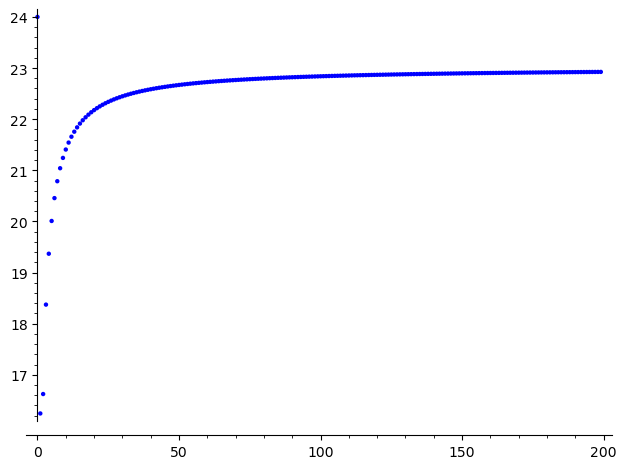

In [82]:
with open('/Users/barrybrent/data/run5oct25no12.txt', 'rb') as rfile:
    maxes_list = pickle.load(rfile) #tauPrime(n) j-companion
slopes=[pair[1]/pair[0]for pair in maxes_list]
print(slopes)
lns=len(slopes)
points=[(k,slopes[k]) for k in [0..lns-1]]
p = list_plot(points, plotjoined=False,size=10, axes_labels=['', ''])
print("maxes slopes")
p.show()